In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import math
import pandas as pd

In [2]:
# load data

file_path = r'C:\Users\palla\Downloads\hcir-lecturtes\lecture-11-statistical_test_slides_exercises_Jan2025_final\statistical_test_slides_exercises_Jan2025_final\Data-for-handbook-upload\Wilcoxons rank.csv'

df = pd.read_csv(file_path)



In [3]:
# describe

df.describe()

,Pre-anxiety,Post-anxiety
count,29.000000,29.000000
mean,21.034483,14.827586
std,5.766175,3.306584
min,10.000000,8.000000
25%,17.000000,13.000000
50%,22.000000,15.000000
75%,25.000000,18.000000
max,32.000000,21.000000


<Axes: ylabel='Count'>

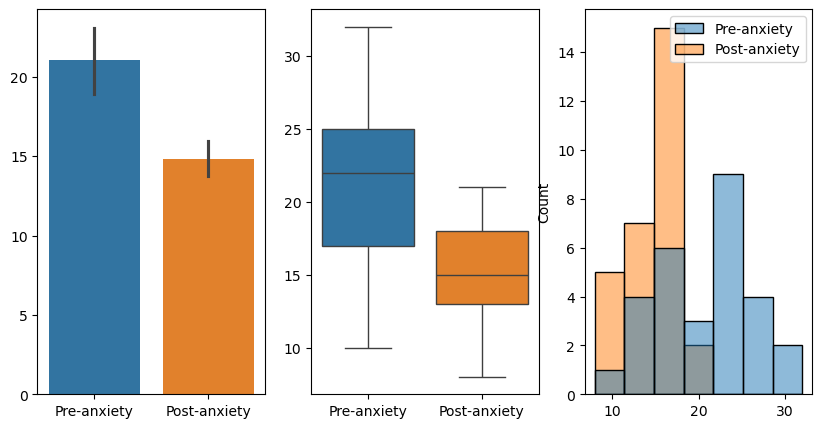

In [9]:
# plot

plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
sns.barplot(data=df)
plt.subplot(1,3,2)
sns.boxplot(data=df)
plt.subplot(1,3,3)
sns.histplot(data=df)

In [23]:
# remove outlier
from scipy.stats import iqr

Q1 =  df.groupby('Pre-anxiety')['Pre-anxiety'].transform(lambda x: x.quantile(0.25))
Q3 = df.groupby('Pre-anxiety')['Pre-anxiety'].transform(lambda x: x.quantile(0.75))

IQR = df.groupby('Pre-anxiety')['Pre-anxiety'].transform(iqr)

has_outlier = df[(df['Post-anxiety'] >= Q1 - 1.5 * IQR) | (df['Post-anxiety'] <= Q3 + 1.5 * IQR)]

if has_outlier.empty:
    print(len(has_outlier))
else:
    print("no outliers")
# print(has_outlier)

no outliers


In [29]:
# Check for normality test

stats_val, p_val = stats.shapiro(df['Post-anxiety'])
stats_val1, p_val1 = stats.shapiro(df['Pre-anxiety'])

print(stats_val, p_val, stats_val1, p_val1)

0.9613889900403882 0.3555131580274171 0.9658655857973096 0.45374413394067614


In [34]:
# as the p_val < 0.05, normality test failed 
# use wilcoxon

final_stats = stats.wilcoxon(df['Post-anxiety'], alternative='two-sided')
final_stats_1 = stats.wilcoxon(df['Pre-anxiety'], alternative='two-sided')

print(final_stats, final_stats_1)


WilcoxonResult(statistic=0.0, pvalue=3.725290298461914e-09) WilcoxonResult(statistic=0.0, pvalue=3.725290298461914e-09)
